# Basic Income Survey 

In this project, I am going to look at basic income survey conducted by Dalia Research in April 2016 on public opinion across 28 EU Member States. The dataset can be found here https://www.kaggle.com/daliaresearch/basic-income-survey-european-dataset.

Table of content 
1. Loading the data and importing packages 
2. Preprocessing 
  - Renaming the variables and droping variables that I don't need
  - Working with missing values 
  - Working with duplicate values 
  - Feature extraction 
3. Visualizing data
4. Machine learning 

In [2]:
#Importing all packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.ticker import PercentFormatter

In [3]:
#Importing dataset 
data = pd.read_csv("./basic_income_dataset_Europe.csv")
data_copy = data.copy()
data_copy

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.9775919155
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,SK,7d1ac020-dcb4-0133-817a-0a81e8b09a82,37,female,urban,high,yes,no,I understand it fully,I would probably vote for it,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,26_39,0.4534108939
9645,SK,39f989f0-db52-0133-8482-0a81e8b09a82,53,male,urban,high,yes,yes,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,40_65,0.4261237973
9646,SK,70ce4a90-d965-0133-f5e4-0a81e8b09a82,24,male,urban,low,no,no,I have heard just a little about it,I would not vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above,14_25,0.6076881098
9647,SK,2896e440-db3c-0133-5b67-0a81e8b09a82,47,male,urban,low,yes,yes,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,40_65,0.8089441199


# Preprocessing 

In [4]:
# Renaming columns and droping column that is not useful

data_copy = data_copy.rename(columns={"rural": "Inhabit", "dem_education_level":"Education_Level", "dem_full_time_job":"Full_Time", "dem_has_children":"Children","question_bbi_2016wave4_basicincome_awareness":"Awareness",	"question_bbi_2016wave4_basicincome_vote":"Vote", "question_bbi_2016wave4_basicincome_effect":"Effect",	"question_bbi_2016wave4_basicincome_argumentsfor":"Arguments_For",	"question_bbi_2016wave4_basicincome_argumentsagainst":"Argument_Against"})
data_copy = data_copy.drop(axis=1, columns=['uuid', 'weight'])
data_copy.head()

,country_code,age,gender,Inhabit,Education_Level,Full_Time,Children,Awareness,Vote,Effect,Arguments_For,Argument_Against,age_group
0,AT,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65
1,AT,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65
2,AT,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39
3,AT,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65
4,AT,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65


In [ ]:
# Looking for basic income survey in Denmark
# Slicing data or filtering using boolean 
#data_sc = data.loc[(data['country_code']=='DK') | (data['country_code']=='SE') | (data['country_code']=='FI')]
#data_dk=data_copy.loc[(data_copy["country_code"]=="DK")]
#data_dk["Inhabit"].value_counts(normalize=True)
#data_dk["Education_Level"].value_counts(normalize=True)
#data_dk["Vote"].value_counts(normalize=True)

In [5]:
# Checking for missing values 
data_copy.isna().sum()

country_code          0
age                   0
gender                0
Inhabit               0
Education_Level     663
Full_Time             0
Children              0
Awareness             0
Vote                  0
Effect                0
Arguments_For         0
Argument_Against      0
age_group             0
dtype: int64

In [6]:
# In education level there are 663 missing values and my assumption on this is probably they don't have any education and that's why they don't want to put it on the survey
data_copy.Education_Level.unique()
data_copy['Education_Level'].fillna('no', inplace=True)
data_copy.Education_Level.value_counts()

medium    3578
high      3270
low       1815
no         986
Name: Education_Level, dtype: int64

In [7]:
#Looking for duplicates 
data_copy.duplicated().sum()
# There are 29 duplicates 
data_copy.drop_duplicates()

,country_code,age,gender,Inhabit,Education_Level,Full_Time,Children,Awareness,Vote,Effect,Arguments_For,Argument_Against,age_group
0,AT,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65
1,AT,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65
2,AT,32,male,urban,no,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39
3,AT,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65
4,AT,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,SK,37,female,urban,high,yes,no,I understand it fully,I would probably vote for it,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,26_39
9645,SK,53,male,urban,high,yes,yes,I have never heard of it,I would probably vote against it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,40_65
9646,SK,24,male,urban,low,no,no,I have heard just a little about it,I would not vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above,14_25
9647,SK,47,male,urban,low,yes,yes,I understand it fully,I would vote for it,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,40_65


In [8]:
def voting(row) :
 if row == 'I would vote for it': return('would vote')
 elif row == 'I would probably vote for it': return('probably vote')
 elif row == 'I would probably vote against it': return('probably against')
 elif row == 'I would vote against it': return('against')
 elif row == 'I would not vote' : return('no vote')

data_copy['Vote']= data_copy['Vote'].apply(voting)
data_copy

,country_code,age,gender,Inhabit,Education_Level,Full_Time,Children,Awareness,Vote,Effect,Arguments_For,Argument_Against,age_group
0,AT,61,male,rural,no,no,no,I know something about it,no vote,None of the above,None of the above,None of the above,40_65
1,AT,57,male,urban,high,yes,yes,I understand it fully,probably vote,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65
2,AT,32,male,urban,no,no,no,I have heard just a little about it,no vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39
3,AT,45,male,rural,high,yes,yes,I have heard just a little about it,probably vote,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65
4,AT,41,female,urban,high,yes,yes,I have heard just a little about it,probably vote,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,SK,37,female,urban,high,yes,no,I understand it fully,probably vote,‰Û_ spend more time with my family,It reduces bureaucracy and administrative expe...,It is impossible to finance,26_39
9645,SK,53,male,urban,high,yes,yes,I have never heard of it,probably against,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,It might encourage people to stop working | On...,40_65
9646,SK,24,male,urban,low,no,no,I have heard just a little about it,no vote,‰Û_ spend more time with my family,It reduces anxiety about financing basic needs,None of the above,14_25
9647,SK,47,male,urban,low,yes,yes,I understand it fully,would vote,A basic income would not affect my work choices,It reduces bureaucracy and administrative expe...,Foreigners might come to my country and take a...,40_65


# Data visualization

(array([1159.,    0., 3272.,    0.,    0.,  960.,    0., 2819.,    0.,
        1439.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

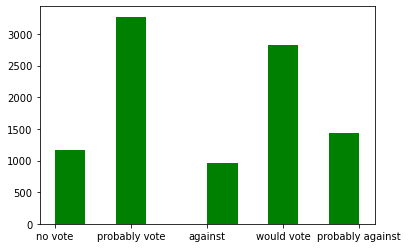

In [9]:
data_copy.Vote.value_counts(normalize=True)
plt.hist(data_copy['Vote'], color='g')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
#plt.show()

Text(0, 0.5, 'Vote')

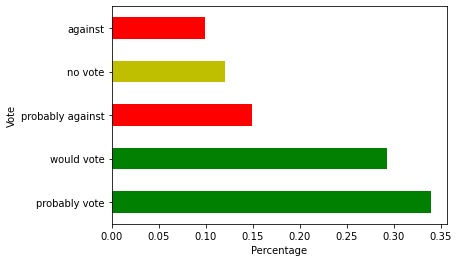

In [33]:
data_copy['Vote'].value_counts(normalize=True).plot(kind='barh', color =['g', 'g', 'r', 'y', 'r'])
plt.xlabel('Percentage')
plt.ylabel('Vote')

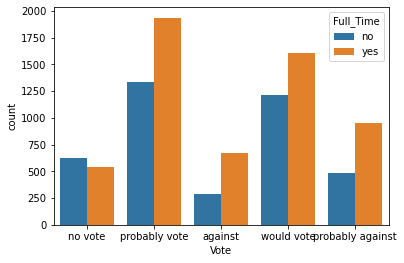

In [11]:
sns.countplot(x="Vote", hue='Full_Time', data=data_copy)


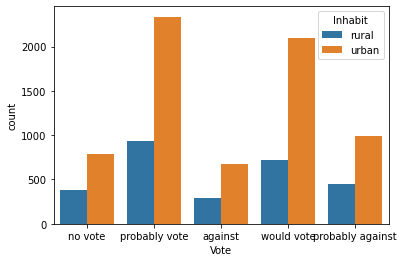

In [12]:
sns.countplot(x="Vote", hue='Inhabit', data=data_copy)

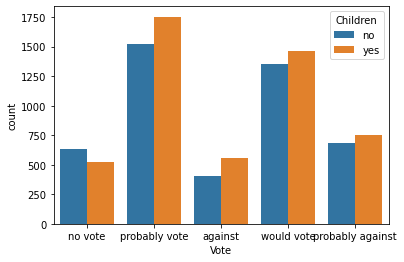

In [13]:
sns.countplot(x="Vote", hue='Children', data=data_copy)

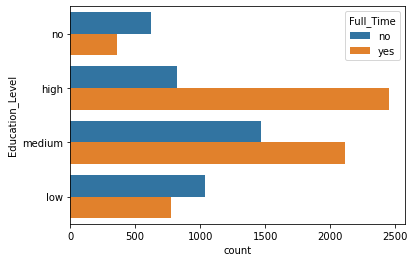

In [14]:
#sns.catplot(x="Education_Level", kind = 'count', hue = 'gender', palette = "ch:.10", data=data_copy)
sns.countplot(y="Education_Level", hue='Full_Time', data=data_copy)

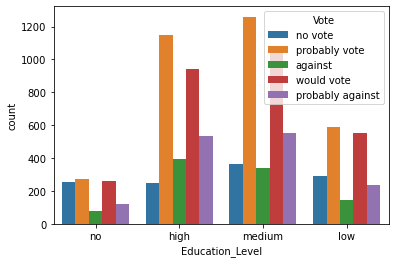

In [15]:
sns.countplot(x="Education_Level", hue='Vote', data=data_copy)


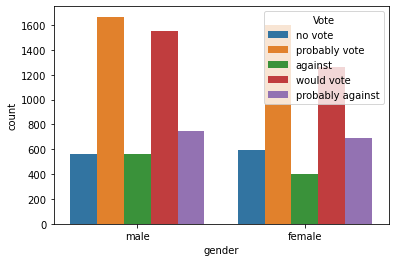

In [16]:
sns.countplot(x="gender", hue='Vote', data=data_copy)


Text(0.5, 1.0, 'Distribution of Age on the respondants')

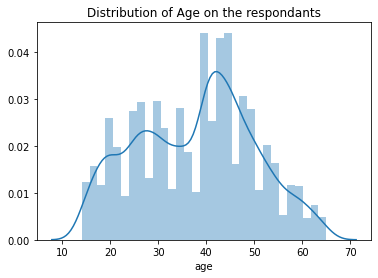

In [32]:
# First let's focus on the distribution of the demographic information we have
#Kde: kernel density estimate, KDE represents the data using a continuous probability density curve in one or more dimensions.
sns.distplot(data_copy['age'], kde=True)
plt.title('Distribution of Age on the respondants')